In [1]:
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk import pos_tag
from nltk.stem import PorterStemmer
from nltk import WordNetLemmatizer
from nltk.corpus import movie_reviews
from nltk.corpus import stopwords
import sentencepiece
import nltk
nltk.download('stopwords')
from collections import Counter
import pandas
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os 
from sklearn.metrics import classification_report
from transformers import TFAlbertModel
from transformers import TFRobertaModel
from transformers import TFDistilBertModel
from transformers import AlbertTokenizer
from transformers import RobertaTokenizer
from transformers import DistilBertTokenizer
import glob
from transformers import *
nltk.download('punkt')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\user\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [2]:
import patoolib
import os

os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
import warnings  # To ignore any warnings

warnings.filterwarnings("ignore")
import os
import glob
import numpy as np
import itertools
import pandas as pd

# Audio
import librosa
import librosa.display

# Scikit learn
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder
from sklearn.utils import shuffle
from sklearn.utils import class_weight

# Keras
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.utils import to_categorical
import warnings

Using TensorFlow backend.


# Preprocessing

In [61]:
INPUT_DIR = 'D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset/**'
 
dataset = []
for filename in glob.iglob(INPUT_DIR):
    kolkuPoKlasa=0
    print(filename)
    for f in glob.iglob(filename+'/**'):
        
        if (kolkuPoKlasa>750):
            kolkuPoKlasa=0
            break
        if os.path.exists(f):
            label = os.path.basename(filename)
            duration = librosa.get_duration(filename=f)
            #print('label', f, 'duration', duration)
           
            if duration >= 0.55:
                kolkuPoKlasa+=1
                #slice_size = 3
                #iterations = int((duration - slice_size) / (slice_size - 1))
                iterations = 1
                #initial_offset = (duration - ((iterations * (slice_size - 1)) + 1)) / 2
                for i in range(iterations):
                    #offset = initial_offset + i * (slice_size - 1)
                    offset = 0
                    if (label == "finish"):
                        dataset.append({
                            "filename": f,
                            "label": "finish",
                            "offset": offset
                        })
                    elif (label == "georgian"):
                        dataset.append({
                            "filename": f,
                            "label": "georgian",
                            "offset": offset
                        })
                    elif (label == "hungarian"):
                        dataset.append({
                            "filename": f,
                            "label": "hungarian",
                            "offset": offset
                        })
                    elif (label == "japanese"):
                        dataset.append({
                            "filename": f,
                            "label": "japanese",
                            "offset": offset
                        })
                    elif (label == "ltalian"):
                        dataset.append({
                            "filename": f,
                            "label": "ltalian",
                            "offset": offset
                        })
                    elif (label == "slovenian"):
                        dataset.append({
                            "filename": f,
                            "label": "slovenian",
                            "offset": offset
                        })
                    elif (label == "swedish"):
                        dataset.append({
                            "filename": f,
                            "label": "swedish",
                            "offset": offset
                        })
                    elif (label == "thai"):
                        dataset.append({
                            "filename": f,
                            "label": "thai",
                            "offset": offset
                        })
                    elif (label == "greek"):
                        dataset.append({
                            "filename": f,
                            "label": "greek",
                            "offset": offset
                        })
                    else:
                        dataset.append({
                            "filename": f,
                            "label": "viatnamese",
                            "offset": offset
                        })
        
print('dlzina na dataset: ',len(dataset))


D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungarian
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japanese
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltalian
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thai
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese
dlzina na dataset:  7510


In [62]:
dataset = pd.DataFrame(dataset)
dataset = shuffle(dataset, random_state=42)
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7510 entries, 4458 to 7270
Data columns (total 3 columns):
filename    7510 non-null object
label       7510 non-null object
offset      7510 non-null int64
dtypes: int64(1), object(2)
memory usage: 234.7+ KB


In [63]:
print(len(dataset),' pred')
# naoganje i brishenje na prazni samples
nuli = []
for i in range(0,len(dataset)):
  y,sr = librosa.load(dataset.filename.iloc[i], duration=0.55)
  if y.any() == 0:
    nuli.append(i)
print(nuli)


7510  pred
[16, 82, 92, 234, 276, 317, 326, 351, 352, 396, 431, 498, 521, 575, 577, 598, 605, 621, 626, 630, 653, 661, 679, 701, 716, 753, 879, 969, 977, 1082, 1114, 1134, 1137, 1141, 1188, 1192, 1201, 1220, 1273, 1289, 1312, 1335, 1341, 1346, 1354, 1391, 1435, 1442, 1472, 1630, 1651, 1691, 1767, 1784, 1855, 1893, 1907, 1979, 1983, 2004, 2008, 2012, 2016, 2037, 2046, 2096, 2099, 2113, 2149, 2152, 2222, 2249, 2259, 2305, 2314, 2358, 2371, 2375, 2447, 2505, 2527, 2530, 2596, 2606, 2621, 2632, 2643, 2657, 2672, 2691, 2720, 2723, 2762, 2772, 2797, 2798, 2804, 2835, 2846, 2876, 2890, 2910, 2950, 2982, 3039, 3043, 3046, 3050, 3078, 3084, 3191, 3225, 3241, 3260, 3272, 3292, 3372, 3377, 3424, 3430, 3474, 3491, 3539, 3633, 3634, 3696, 3737, 3759, 3791, 3811, 3827, 3846, 3866, 3886, 3939, 3969, 4001, 4049, 4068, 4078, 4088, 4109, 4120, 4160, 4212, 4218, 4291, 4311, 4343, 4369, 4571, 4650, 4657, 4677, 4692, 4727, 4765, 4806, 4839, 4917, 4953, 4976, 5013, 5016, 5045, 5060, 5064, 5093, 5177, 5266, 

In [64]:
dataset = dataset.drop(index=nuli)
print('po izbrisheni dolzijna',len(dataset))

po izbrisheni dolzijna 7276


In [65]:

train, test = train_test_split(dataset, test_size=0.2, random_state=42)
x_train = []
x_test = []
x_val = []

encoder = LabelEncoder()
encoder.fit(train.label)

y_train = encoder.transform(train.label)

y_test =  encoder.transform(test[:int(len(test)*0.5)].label)
y_val =   encoder.transform(test[int(len(test)*0.5):].label)

for idx in range(len(train)):
    x_train.append(extract_features(train.filename.iloc[idx], train.offset.iloc[idx]))

# 10 % test data
for idx in range(0,len(test)//2):
    x_test.append(extract_features(test.filename.iloc[idx], test.offset.iloc[idx]))
    

# 10% val data
for idx in range(len(test)//2,len(test)):
    x_val.append(extract_features(test.filename.iloc[idx], test.offset.iloc[idx]))
    



In [66]:
x_test = np.asarray(x_test)
x_val = np.asarray(x_val)
x_train = np.asarray(x_train)


    # Compute class weights
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train), y_train)
    #test
#class_weights = {i: class_weights[i] for i in range(len(class_weights))}
    #test
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], x_test.shape[2], 1)
x_val = x_val.reshape(x_val.shape[0], x_val.shape[1], x_val.shape[2], 1)
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)
y_val = to_categorical(y_val)

print("X train:", x_train.shape)
print("Y train:", y_train.shape)
print("X test:", x_test.shape)
print("Y test:", y_test.shape)

print("X validation:", x_val.shape)
print("Y validation:", y_val.shape)

print(class_weights)

X train: (5820, 40, 24, 1)
Y train: (5820, 10)
X test: (728, 40, 24, 1)
Y test: (728, 10)
X validation: (728, 40, 24, 1)
Y validation: (728, 10)
[0.99317406 1.00172117 0.97651007 1.03928571 1.02464789 1.02464789
 0.96838602 0.97161937 1.01041667 0.99487179]


In [59]:
#Extract MFCC from spectogram
def extract_features(audio_path, offset):
    y, sr = librosa.load(audio_path, offset=offset, duration=0.55)

    S = librosa.feature.melspectrogram(y, sr=sr, n_fft=2048,
                                       hop_length=512,
                                       n_mels=128)
    mfccs = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=40)

    return mfccs




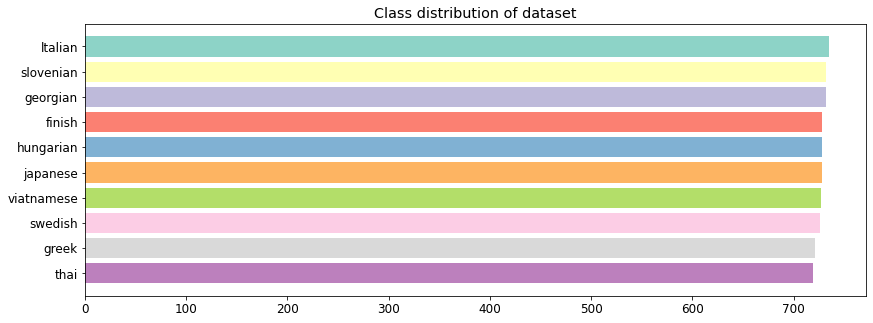

In [67]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (14, 5)
matplotlib.rcParams['font.size'] = 12
from matplotlib import pyplot as plt

num_classes = 10
class_counts = dataset.label.value_counts()
cmap = plt.cm.get_cmap(plt.cm.Set3, 10)
colors = [cmap(i) for i in range(num_classes)]
plt.barh(range(num_classes)[::-1], class_counts, tick_label=dataset.label.unique(),
         color=colors)
plt.title('Class distribution of dataset')
plt.show()

D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\ltalian\common_voice_lt_23717233.mp3
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\slovenian\common_voice_sl_17419687.mp3
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\georgian\common_voice_ka_21358014.mp3
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\finish\common_voice_fi_23439531.mp3
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\hungarian\common_voice_hu_23356681.mp3
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\japanese\common_voice_ja_19485569.mp3
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\viatnamese\common_voice_vi_22402445.mp3
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\swedish\common_voice_sv-SE_18712218.mp3
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\greek\common_voice_el_20429808.mp3
D:/studies7/Natural_Language_processing/MAIN_PROJECT/dataset\thai\common_voice_th_23646698.mp3


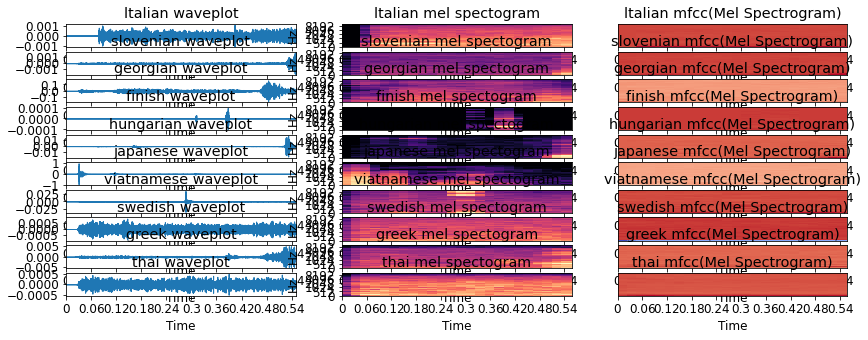

In [68]:
idx = 0
for label in dataset.label.unique():    
    y, sr = librosa.load(dataset[dataset.label==label].filename.iloc[3], duration=0.55)
    print(dataset[dataset.label==label].filename.iloc[3])
    
    # Wave plot
    idx+=1
    
    plt.subplot(10, 3, idx)
    plt.title("%s waveplot" % label)
    librosa.display.waveplot(y, sr=sr)

    # Mel Spectrogram
    idx+=1
    plt.subplot(10, 3, idx)
    S = librosa.feature.melspectrogram(y, sr=sr, n_fft=2048, hop_length=512, n_mels=128)
    S_DB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_DB, sr=sr, hop_length=512, x_axis='time', y_axis='mel')
    plt.title("%s mel spectogram" % label)

    # MFCC (Mel spectrogram)
    idx+=1
    mfccs = librosa.feature.mfcc(S=librosa.power_to_db(S), n_mfcc=40)
    plt.subplot(10, 3, idx)
    librosa.display.specshow(mfccs, x_axis='time')
    plt.title("%s mfcc(Mel Spectrogram)" % label)
plt.show()

# Model

In [51]:
model = Sequential()
model.add(Conv2D(filters=16, kernel_size=2, input_shape=(x_train.shape[1], x_train.shape[2], x_train.shape[3]),
                 activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=32, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=64, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.2))

model.add(Conv2D(filters=128, kernel_size=2, activation='relu'))
model.add(MaxPooling2D(pool_size=2))
model.add(Dropout(0.5))
model.add(GlobalAveragePooling2D())

model.add(Dense(len(encoder.classes_), activation='softmax'))
model.summary()

adam = keras.optimizers.Adam(learning_rate=0.001)
model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')


Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 39, 172, 16)       80        
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 19, 86, 16)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 19, 86, 16)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 18, 85, 32)        2080      
_________________________________________________________________
max_pooling2d_10 (MaxPooling (None, 9, 42, 32)         0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 9, 42, 32)         0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 8, 41, 64)        

In [52]:
history = model.fit(x_train, y_train,
                    batch_size=128,
                    epochs=333,
                    validation_data=(x_val, y_val),
                    class_weight=class_weights,
                    shuffle=True)


model_name = "language_classifier-4s-better-val.h5"
model.save(model_name)

Train on 6008 samples, validate on 751 samples
Epoch 1/333
6008/6008 [==============================] - 29s 5ms/step - loss: 4.5328 - accuracy: 0.1265 - val_loss: 2.2263 - val_accuracy: 0.1625
Epoch 2/333
6008/6008 [==============================] - 23s 4ms/step - loss: 2.2369 - accuracy: 0.1876 - val_loss: 2.0436 - val_accuracy: 0.3196
Epoch 3/333
6008/6008 [==============================] - 22s 4ms/step - loss: 2.0459 - accuracy: 0.2520 - val_loss: 1.9268 - val_accuracy: 0.3915
Epoch 4/333
6008/6008 [==============================] - 26s 4ms/step - loss: 1.8946 - accuracy: 0.3354 - val_loss: 1.7712 - val_accuracy: 0.4913
Epoch 5/333
6008/6008 [==============================] - 35s 6ms/step - loss: 1.7703 - accuracy: 0.3941 - val_loss: 1.6569 - val_accuracy: 0.5446
Epoch 6/333
6008/6008 [==============================] - 33s 6ms/step - loss: 1.6592 - accuracy: 0.4389 - val_loss: 1.5674 - val_accuracy: 0.5606
Epoch 7/333
6008/6008 [==============================] - 33s 6ms/step - loss:

6008/6008 [==============================] - 35s 6ms/step - loss: 0.5454 - accuracy: 0.8207 - val_loss: 0.4612 - val_accuracy: 0.8775
Epoch 57/333
6008/6008 [==============================] - 30s 5ms/step - loss: 0.5667 - accuracy: 0.8172 - val_loss: 0.4212 - val_accuracy: 0.8722
Epoch 58/333
6008/6008 [==============================] - 30s 5ms/step - loss: 0.5500 - accuracy: 0.8244 - val_loss: 0.4351 - val_accuracy: 0.8895
Epoch 59/333
6008/6008 [==============================] - 30s 5ms/step - loss: 0.5335 - accuracy: 0.8319 - val_loss: 0.4279 - val_accuracy: 0.8748
Epoch 60/333
6008/6008 [==============================] - 28s 5ms/step - loss: 0.5502 - accuracy: 0.8181 - val_loss: 0.4132 - val_accuracy: 0.8762
Epoch 61/333
6008/6008 [==============================] - 31s 5ms/step - loss: 0.5156 - accuracy: 0.8336 - val_loss: 0.4214 - val_accuracy: 0.8842
Epoch 62/333
6008/6008 [==============================] - 32s 5ms/step - loss: 0.5134 - accuracy: 0.8319 - val_loss: 0.3928 - val_a

Epoch 112/333
6008/6008 [==============================] - 31s 5ms/step - loss: 0.3335 - accuracy: 0.8891 - val_loss: 0.2794 - val_accuracy: 0.9148
Epoch 113/333
6008/6008 [==============================] - 30s 5ms/step - loss: 0.3334 - accuracy: 0.8860 - val_loss: 0.2832 - val_accuracy: 0.9148
Epoch 114/333
6008/6008 [==============================] - 31s 5ms/step - loss: 0.3216 - accuracy: 0.8926 - val_loss: 0.2791 - val_accuracy: 0.9188
Epoch 115/333
6008/6008 [==============================] - 31s 5ms/step - loss: 0.3433 - accuracy: 0.8838 - val_loss: 0.3064 - val_accuracy: 0.9095
Epoch 116/333
6008/6008 [==============================] - 30s 5ms/step - loss: 0.3328 - accuracy: 0.8903 - val_loss: 0.2817 - val_accuracy: 0.9108
Epoch 117/333
6008/6008 [==============================] - 33s 5ms/step - loss: 0.3215 - accuracy: 0.8926 - val_loss: 0.2692 - val_accuracy: 0.9174
Epoch 118/333
6008/6008 [==============================] - 30s 5ms/step - loss: 0.2949 - accuracy: 0.8998 - val_

6008/6008 [==============================] - 29s 5ms/step - loss: 0.2573 - accuracy: 0.9106 - val_loss: 0.2582 - val_accuracy: 0.9254
Epoch 168/333
6008/6008 [==============================] - 28s 5ms/step - loss: 0.2573 - accuracy: 0.9129 - val_loss: 0.2820 - val_accuracy: 0.9214
Epoch 169/333
6008/6008 [==============================] - 28s 5ms/step - loss: 0.2456 - accuracy: 0.9159 - val_loss: 0.2690 - val_accuracy: 0.9188
Epoch 170/333
6008/6008 [==============================] - 28s 5ms/step - loss: 0.2457 - accuracy: 0.9166 - val_loss: 0.2729 - val_accuracy: 0.9241
Epoch 171/333
6008/6008 [==============================] - 28s 5ms/step - loss: 0.2351 - accuracy: 0.9199 - val_loss: 0.2701 - val_accuracy: 0.9268
Epoch 172/333
6008/6008 [==============================] - 27s 5ms/step - loss: 0.2268 - accuracy: 0.9206 - val_loss: 0.2594 - val_accuracy: 0.9294
Epoch 173/333
6008/6008 [==============================] - 29s 5ms/step - loss: 0.2304 - accuracy: 0.9233 - val_loss: 0.2745 -

6008/6008 [==============================] - 31s 5ms/step - loss: 0.2024 - accuracy: 0.9341 - val_loss: 0.2541 - val_accuracy: 0.9294
Epoch 223/333
6008/6008 [==============================] - 33s 5ms/step - loss: 0.2025 - accuracy: 0.9293 - val_loss: 0.2649 - val_accuracy: 0.9254
Epoch 224/333
6008/6008 [==============================] - 32s 5ms/step - loss: 0.2023 - accuracy: 0.9298 - val_loss: 0.2472 - val_accuracy: 0.9268
Epoch 225/333
6008/6008 [==============================] - 31s 5ms/step - loss: 0.1945 - accuracy: 0.9341 - val_loss: 0.2559 - val_accuracy: 0.9308
Epoch 226/333
6008/6008 [==============================] - 30s 5ms/step - loss: 0.1937 - accuracy: 0.9338 - val_loss: 0.2445 - val_accuracy: 0.9321
Epoch 227/333
6008/6008 [==============================] - 30s 5ms/step - loss: 0.1960 - accuracy: 0.9314 - val_loss: 0.2824 - val_accuracy: 0.9241
Epoch 228/333
6008/6008 [==============================] - 27s 4ms/step - loss: 0.1999 - accuracy: 0.9288 - val_loss: 0.2442 -

6008/6008 [==============================] - 29s 5ms/step - loss: 0.1766 - accuracy: 0.9417 - val_loss: 0.2491 - val_accuracy: 0.9294
Epoch 278/333
6008/6008 [==============================] - 30s 5ms/step - loss: 0.1817 - accuracy: 0.9389 - val_loss: 0.2390 - val_accuracy: 0.9348
Epoch 279/333
6008/6008 [==============================] - 29s 5ms/step - loss: 0.1787 - accuracy: 0.9396 - val_loss: 0.2268 - val_accuracy: 0.9454
Epoch 280/333
6008/6008 [==============================] - 30s 5ms/step - loss: 0.1800 - accuracy: 0.9399 - val_loss: 0.2424 - val_accuracy: 0.9374
Epoch 281/333
6008/6008 [==============================] - 30s 5ms/step - loss: 0.1814 - accuracy: 0.9371 - val_loss: 0.2552 - val_accuracy: 0.9308
Epoch 282/333
6008/6008 [==============================] - 29s 5ms/step - loss: 0.1849 - accuracy: 0.9361 - val_loss: 0.2275 - val_accuracy: 0.9414
Epoch 283/333
6008/6008 [==============================] - 30s 5ms/step - loss: 0.1719 - accuracy: 0.9421 - val_loss: 0.2150 -

6008/6008 [==============================] - 22s 4ms/step - loss: 0.1589 - accuracy: 0.9464 - val_loss: 0.2556 - val_accuracy: 0.9321
Epoch 333/333
6008/6008 [==============================] - 22s 4ms/step - loss: 0.1532 - accuracy: 0.9471 - val_loss: 0.2309 - val_accuracy: 0.9308


In [53]:
predictions = model.predict(x_test, verbose=1)

y_true, y_pred = [],[]
classes = encoder.classes_
for idx, prediction in enumerate(predictions): 
    y_true.append(classes[np.argmax(y_test[idx])])
    y_pred.append(classes[np.argmax(prediction)])
    
print(classification_report(y_pred, y_true))

751/751 [==============================] - 1s 1ms/step
              precision    recall  f1-score   support

      finish       0.95      0.98      0.96        81
    georgian       0.95      0.82      0.88        74
       greek       0.96      0.96      0.96        78
   hungarian       0.94      1.00      0.97        72
    japanese       0.89      0.92      0.91        64
     ltalian       0.96      0.94      0.95        81
   slovenian       0.90      0.99      0.94        75
     swedish       0.93      0.82      0.87        78
        thai       0.95      0.92      0.94        79
  viatnamese       0.86      0.94      0.90        69

    accuracy                           0.93       751
   macro avg       0.93      0.93      0.93       751
weighted avg       0.93      0.93      0.93       751

